In [119]:

import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

In [120]:
df = pd.read_csv("C:/Users/KIIT0001/Main.java/customer_segmentation/notebook/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [121]:
df.info()
df.isna().sum()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   str    
 3   Marital_Status       2240 non-null   str    
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   str    
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64  
 16 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [122]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [123]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],format="%d-%m-%Y")
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[us]

In [124]:
df['Education'].value_counts()


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [125]:
columns=[cols for cols in df.columns if cols !="ID"]
cat_cols=[cols for cols in columns if df[cols].dtype=='str']
num_cols=[cols for cols in columns if df[cols].dtype!='str']
cat_cols,len(num_cols)



(['Education', 'Marital_Status'], 26)

In [126]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [127]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   str           
 3   Marital_Status       2240 non-null   str           
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[us]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-null   int64  

In [128]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

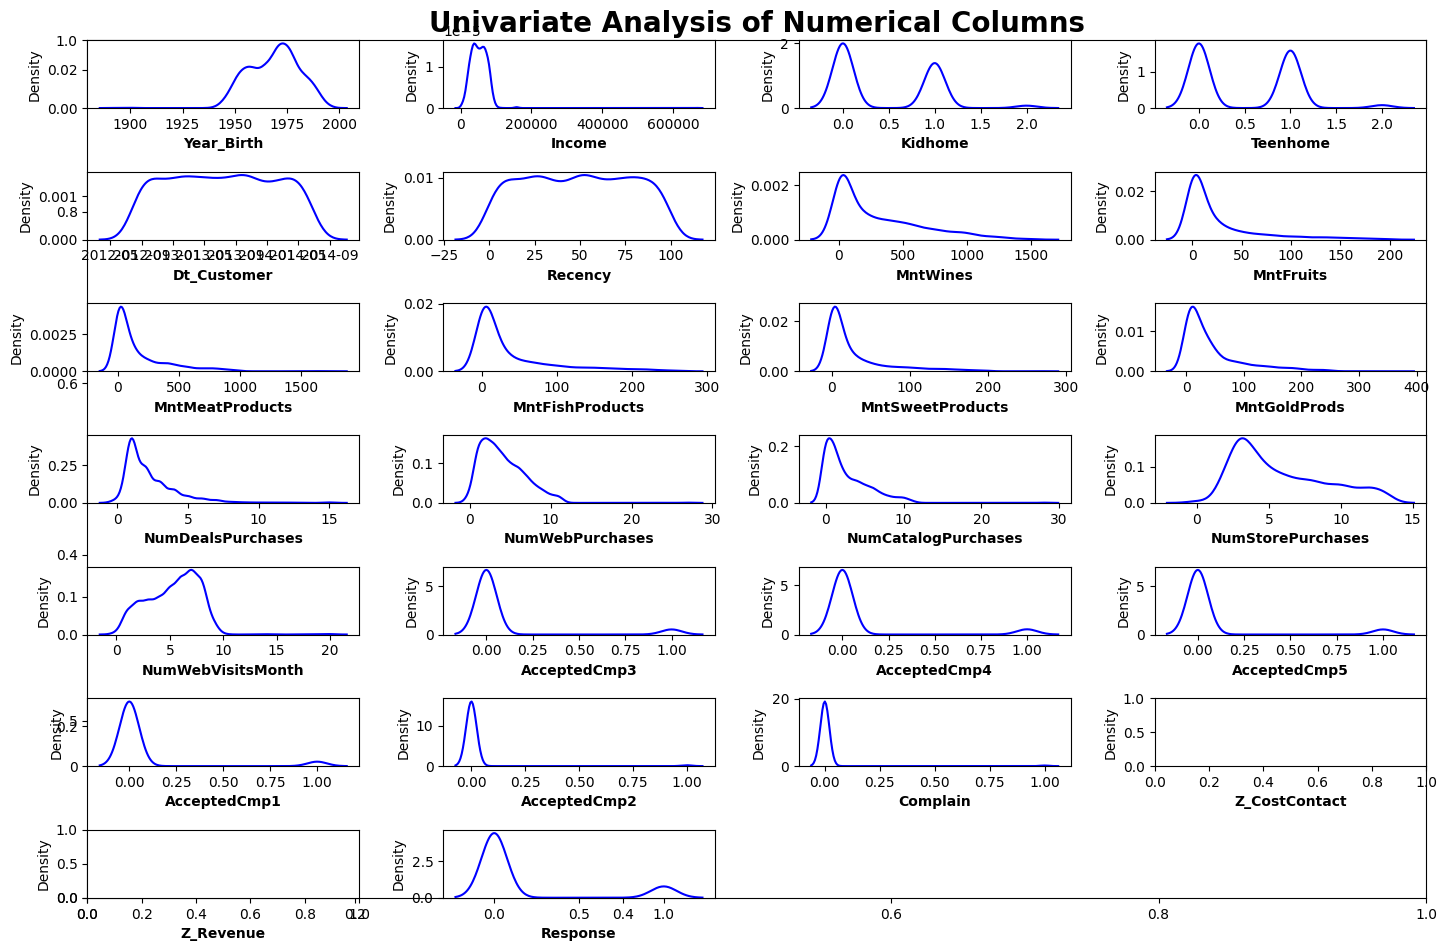

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.title("Univariate Analysis of Numerical Columns",fontsize=20,color='black',fontweight='bold')
for cols in range(0,len(num_cols)):
    plt.subplot(7,4,cols+1)
    sns.kdeplot(df[num_cols[cols]],color='blue')
    plt.xlabel(num_cols[cols],fontsize=10,color='black',fontweight='bold')
    plt.tight_layout()

Year_Birth – Approximately normally distributed with most customers born between 1965–1985.
Income – Highly right-skewed with a few extreme high-income outliers.
Kidhome – Majority of customers have 0 or 1 child at home.
Teenhome – Most customers have no teenagers at home.
Dt_Customer – Customers are fairly evenly distributed across enrollment dates.
Recency – Purchase recency values are relatively uniformly distributed.
MntWines – Strong right-skew indicating few heavy wine spenders.
MntFruits – Highly right-skewed with most customers spending very little.
MntMeatProducts – Right-skewed distribution with some high-spending outliers.
MntFishProducts – Majority spend near zero with few large purchasers.
MntSweetProducts – Right-skewed with most spending concentrated at low values.
MntGoldProds – Moderately right-skewed with varied spending levels.
NumDealsPurchases – Most customers use few deals, with a small group using many.
NumWebPurchases – Majority make limited online purchases.
NumCatalogPurchases – Strong right-skew with most customers rarely using catalogs.
NumStorePurchases – More balanced distribution with moderate in-store purchasing.
NumWebVisitsMonth – Most customers visit the website around 4–8 times monthly.
AcceptedCmp3 – Highly imbalanced with very few campaign acceptances.
AcceptedCmp4 – Very low acceptance rate indicating class imbalance.
AcceptedCmp5 – Extremely imbalanced with most customers not accepting the campaign.

In [130]:
#as z_Revenue and z_CostContact do not have variance, we will drop these columns
df.drop(['Z_Revenue','Z_CostContact'],axis=1,inplace=True)
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='str')

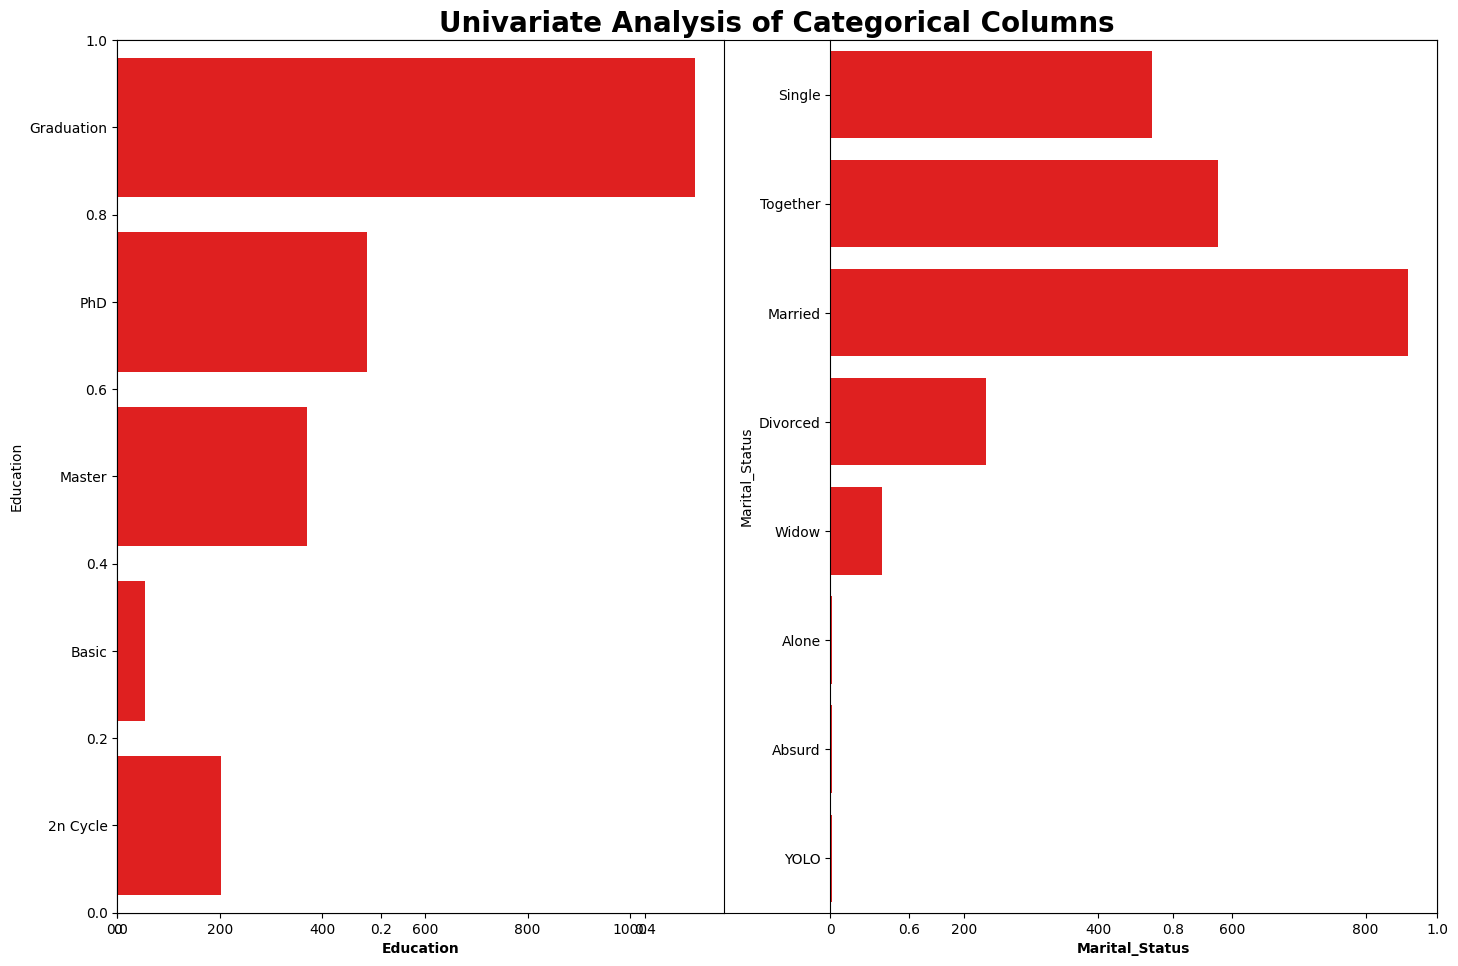

In [131]:
#For cat cols
plt.figure(figsize=(15,10))
plt.title("Univariate Analysis of Categorical Columns",fontsize=20,color='black',fontweight='bold')
for cols in range(0,len(cat_cols)):
    plt.subplot(1,2,cols+1)
    sns.countplot(df[cat_cols[cols]],color='red')
    
    plt.xlabel(cat_cols[cols],fontsize=10,color='black',fontweight='bold')
    plt.tight_layout()

Education – Most customers are graduates, followed by PhD and Master holders, with very few having basic education.

Marital_Status – Majority of customers are married or living together, while categories like Alone, Absurd, and YOLO have negligible representation.

<Axes: >

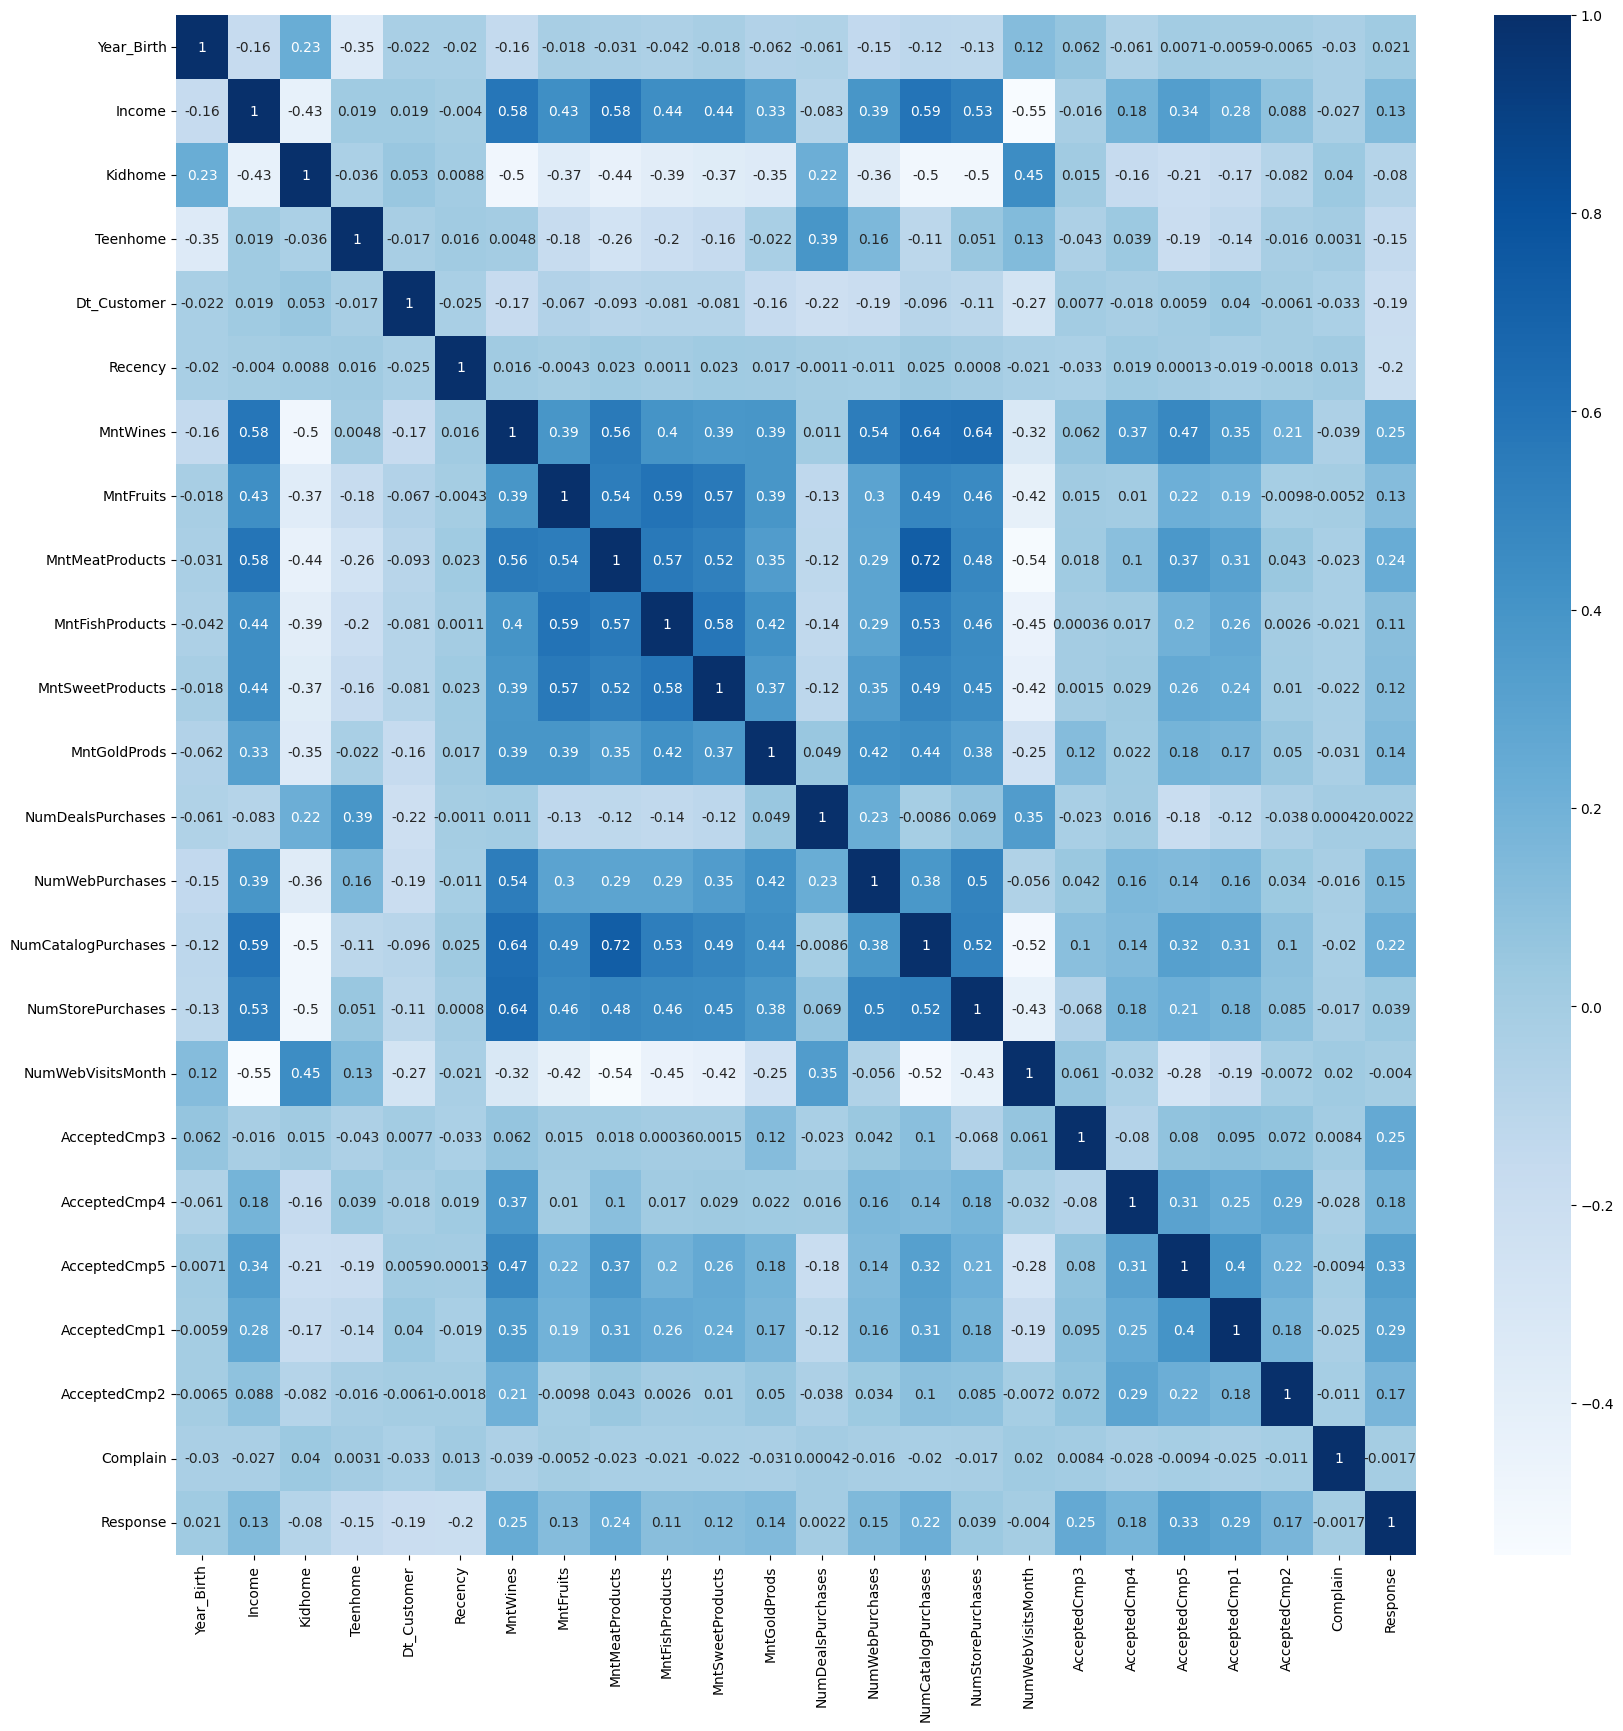

In [132]:
#multivariate analysis
num_cols.remove('Z_Revenue')
num_cols.remove('Z_CostContact')
plt.figure(figsize=(20,20))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='Blues')

In [133]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [134]:
df.Income.isna().sum()

np.int64(0)

In [135]:
raw_df=df.copy()

In [136]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [137]:
df['Year_Birth'].max()
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [138]:
from datetime import datetime



df['Age']=2022-df['Year_Birth']   

df["Education"]=df["Education"].map({"Basic":0,"2n Cycle":1, "Graduation":2, "Master":3, "PhD":4},inplace=True)  

df['Marital_Status']=df['Marital_Status'].map({"Married":1, "Together":1, "Absurd":0, "Widow":0, "YOLO":0, "Divorced":0, "Single":0,"Alone":0},inplace=True) 






In [139]:
df['Children']=df['Kidhome']+df['Teenhome']
df['Partner']=df['Marital_Status'].apply(lambda x: 1 if x==1 else 0)

df['Family_Size']=df['Partner']+df['Children']+1

df['Total_Spending']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Total_Promo"] =  df["AcceptedCmp1"].astype(int)+ df["AcceptedCmp2"].astype(int)+ df["AcceptedCmp3"].astype(int)+ df["AcceptedCmp4"].astype(int)+ df["AcceptedCmp5"].astype(int)

df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
today=datetime.today()
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days
df['Offers_Responded_To']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df["Parental Status"] = np.where(df["Children"] > 0, 1, 0)

In [141]:
#dropping columns which are already used to create new features
#columns_to_drop = ['Year_Birth','Kidhome','Teenhome']
#df.drop(columns = columns_to_drop, axis = 1, inplace=True)
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)
df = df[["Age","Education","Marital Status","Parental Status","Children","Income","Total_Spending","Days_as_Customer","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total_Promo","NumWebVisitsMonth"]]

In [144]:
df

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total_Promo,NumWebVisitsMonth
0,65,2,0,0,0,58138.0,1617,4910,58,635,...,546,172,88,88,8,10,4,3,0,7
1,68,2,0,1,2,46344.0,27,4360,38,11,...,6,2,1,6,1,1,2,2,0,5
2,57,2,1,0,0,71613.0,776,4559,26,426,...,127,111,21,42,8,2,10,1,0,4
3,38,2,1,1,1,26646.0,53,4386,26,11,...,20,10,3,5,2,0,4,2,0,6
4,41,4,1,1,1,58293.0,422,4408,94,173,...,118,46,27,15,5,3,6,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,2,1,1,1,61223.0,1341,4628,46,709,...,182,42,118,247,9,3,4,2,0,5
2236,76,4,1,1,3,64014.0,444,4266,56,406,...,30,0,0,8,8,2,5,7,1,7
2237,41,2,0,0,0,56981.0,1241,4402,91,908,...,217,32,12,24,2,3,13,1,1,6
2238,66,3,1,1,1,69245.0,843,4403,8,428,...,214,80,30,61,6,5,10,2,0,3


In [148]:
df.columns
df.shape


(2240, 21)

In [149]:
columns = [column for column in df.columns if column != "ID"]

numeric_features = [feature for feature in columns if df[feature].dtype != 'O']

continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Names of continues features :',continuous_features)

Names of continues features : ['Age', 'Income', 'Total_Spending', 'Days_as_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Web', 'Catalog', 'Store', 'Discount Purchases', 'NumWebVisitsMonth']


In [153]:
%pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

        
#we will remove the datetime column which is not required for the vif checking
cont_features = continuous_features.copy()

# we will not chech vif for total spending, as it is the summation of Wines,Fruits,Meat,Fish,Sweets,Gold.
cont_features.remove('Total_Spending')
compute_vif(cont_features, df)
# other_columns


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\KIIT0001\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached statsmodels-0.14.6-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached scipy-1.17.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 217.9 kB/s eta 0:00:44
   ---------------------------------------- 0.0/9.6 MB 217.9 kB/s eta 0:00:44
   ---------------------------------------- 0.0/9.6 MB 245.8 kB/s eta 0:00:39
   ---------------------------------------- 0.1/9.6 MB 438.1 kB/s eta 0:00:22
    --------------------------------------- 0.2/9.6 MB 919.0 kB/s eta 0:00:11
   - -------------------------------------- 0.5/9.6 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.6 MB 2.0 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.6 MB 2.5 MB/s eta 0:00:04
   ----- --------------------

,Variable,VIF
0,Age,1.075265
1,Income,2.125893
2,Days_as_Customer,1.275059
3,Recency,1.004938
4,Wines,2.642362
5,Fruits,1.933450
6,Meat,2.757364
7,Fish,2.068554
8,Sweets,1.898322
9,Gold,1.484205


no vif is greater than 5. So we dont drop any column.

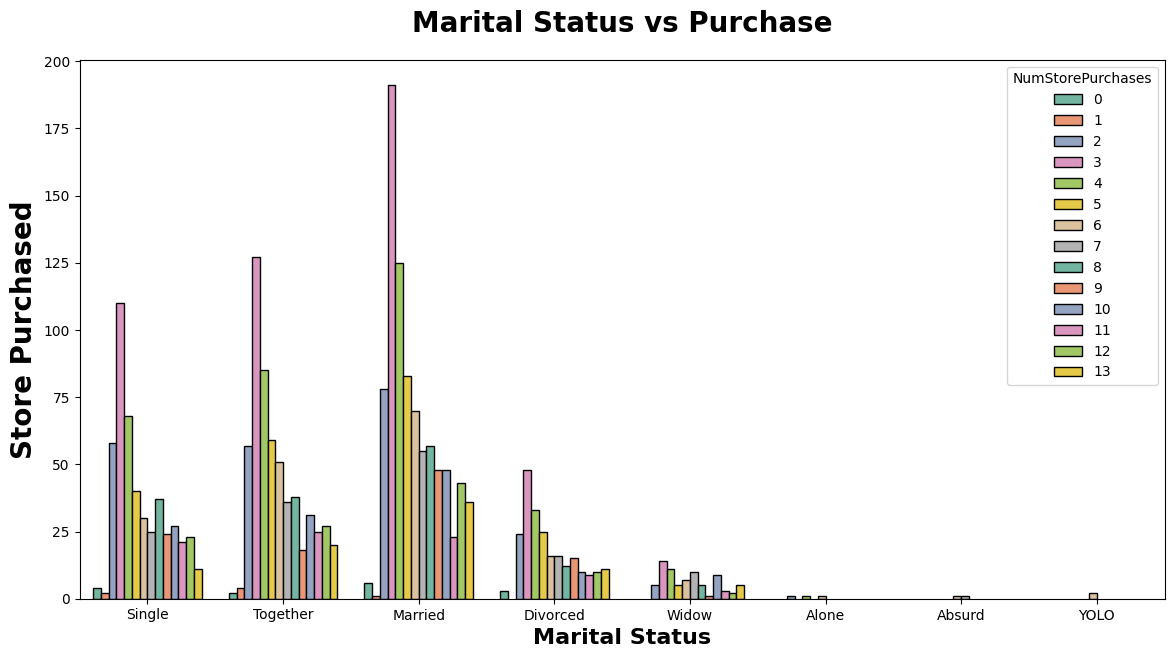

In [155]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Marital_Status",hue="NumStorePurchases", data=raw_df,ec = "black",palette="Set2")
plt.title("Marital Status vs Purchase", weight="bold",fontsize=20, pad=20)
plt.ylabel("Store Purchased", weight="bold", fontsize=20)
plt.xlabel("Marital Status", weight="bold", fontsize=16)
plt.show()

In [160]:
df.head()
raw_df.head()
raw_df['Dt_Customer'].min(),raw_df['Dt_Customer'].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

In [161]:
df.head()

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,...,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total_Promo,NumWebVisitsMonth
0,65,2,0,0,0,58138.0,1617,4910,58,635,...,546,172,88,88,8,10,4,3,0,7
1,68,2,0,1,2,46344.0,27,4360,38,11,...,6,2,1,6,1,1,2,2,0,5
2,57,2,1,0,0,71613.0,776,4559,26,426,...,127,111,21,42,8,2,10,1,0,4
3,38,2,1,1,1,26646.0,53,4386,26,11,...,20,10,3,5,2,0,4,2,0,6
4,41,4,1,1,1,58293.0,422,4408,94,173,...,118,46,27,15,5,3,6,5,0,5


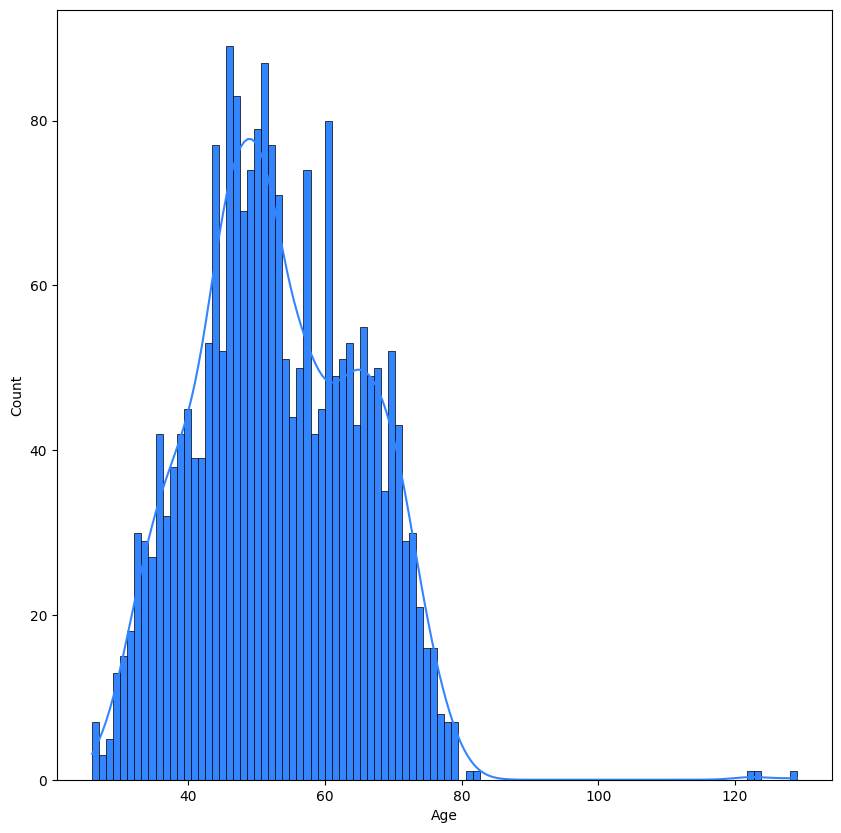

In [169]:
plt.figure(figsize=(10,10))
p = sns.histplot(df["Age"],color="#3385ff",kde=True,bins=100,alpha=1,fill=True,edgecolor="black")

as we can that most customer are under 80 age.

In [172]:
df=df[df['Age']<80]

(0.0, 200000.0)

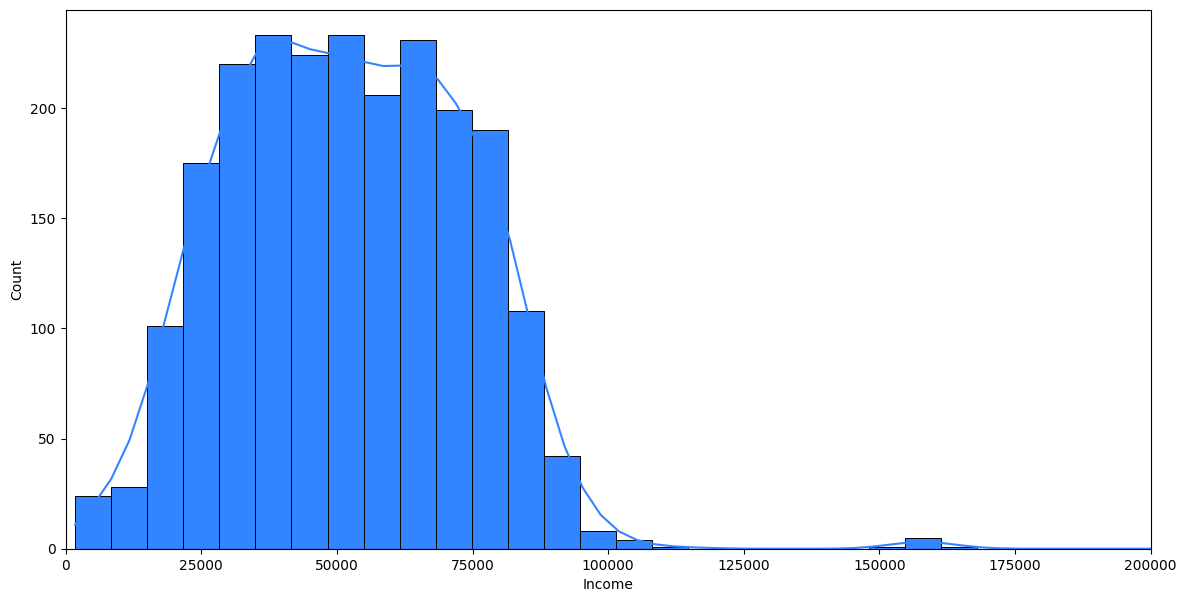

In [187]:
plt.figure(figsize=(14,7))
sns.histplot(df["Income"],color="#3385ff",kde=True,bins=100,alpha=1,fill=True,edgecolor="black")
plt.xlim(0,200000)


In [195]:
df=df[df['Income']<120000]
df.shape

(2227, 21)

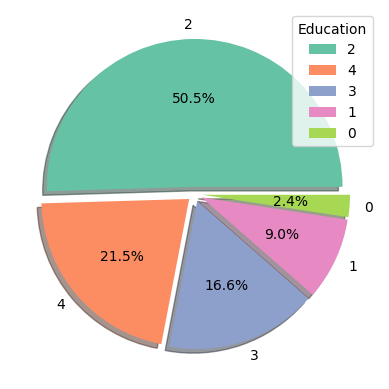

In [213]:
plt.pie(df["Education"].value_counts(),labels=df["Education"].value_counts().index,shadow=True,autopct="%1.1f%%",colors=sns.color_palette("Set2"),explode=[0.05]*5)
plt.legend(title="Education",loc="upper right")

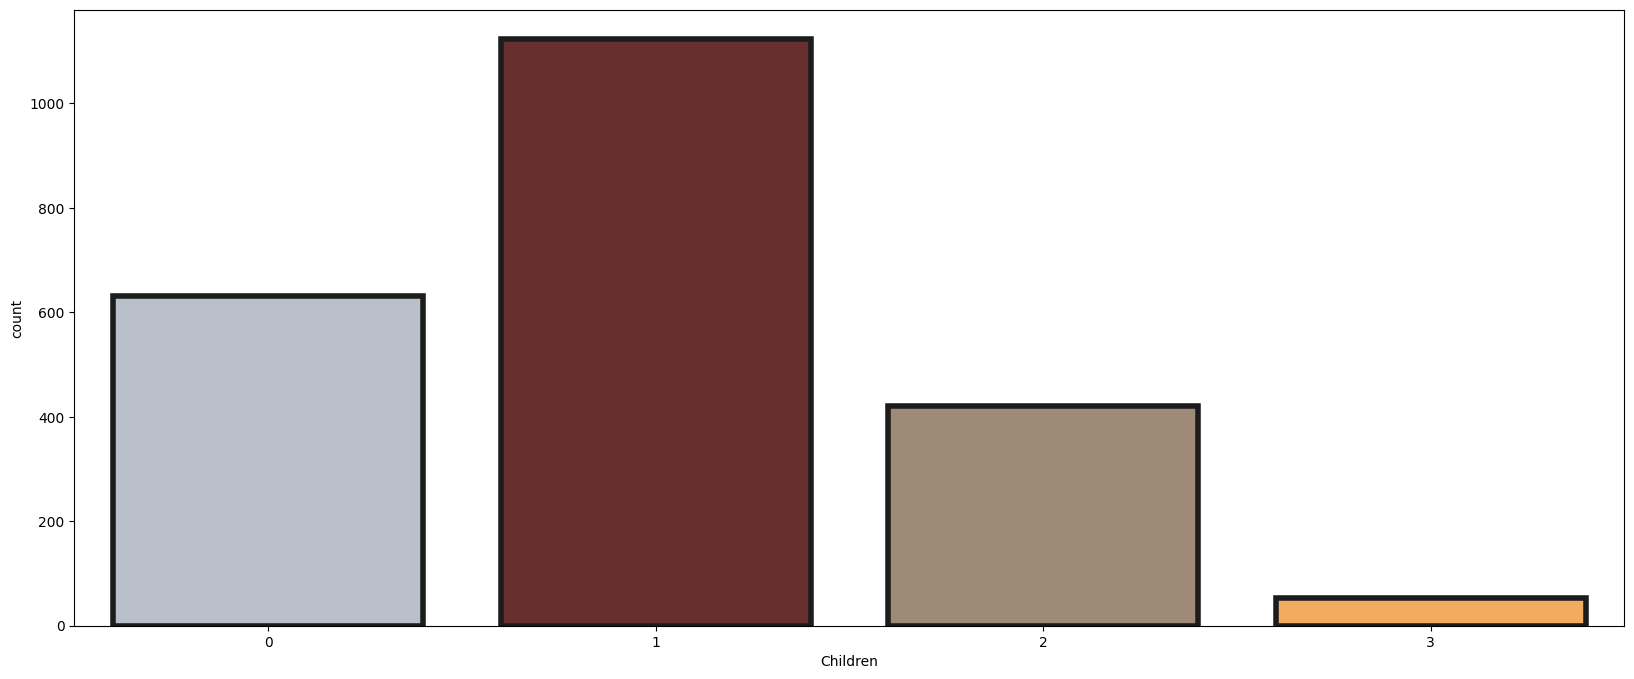

In [209]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Children"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)

In [214]:
df["Children"].value_counts()

Children
1    1123
0     631
2     420
3      53
Name: count, dtype: int64